https://oj.rnd.huawei.com/problems/3547/details

小E需要对表格的选定矩形区域进行排序：

给定选定区域内的某些列作为排序条件 sortCols；排序时选定区域内的行数据联动，选定区域外不联动
排序规则：
排序条件可能是多列，按输入顺序，优先级依次降低。
对于每个排序条件，按值的大小进行升序排序；若值相同，则保持原有行的相对顺序不变。
请编写一个程序帮助他完成该任务，并输出排序后的完整表格。

解答要求
时间限制：1000ms, 内存限制：256MB
输入
第一个参数是二维数组 grid，1 <= grid.length, grid[0].length <= 100, 0 <= grid[i][j] <= 100
第二个参数是一维数组 area，1 <= area[i] <= 100, area[2] >= area[0], area[3] >= area[1]
第三个参数是一维数组 sortCols，1 <= sortCols[i] <= area[3] - rea[1] + 1

输出
排序后的完整表格

样例
输入样例 1 复制
```
[[1, 2, 2, 3, 4], [1, 2, 3, 7, 5], [1, 1, 3, 5, 6], [1, 4, 1, 6, 7]]
[2, 3, 4, 5]
[1, 2]
```
输出样例 1
```
[[1, 2, 2, 3, 4],
[1, 2, 1, 6, 7],
[1, 1, 3, 5, 6],
[1, 4, 3, 7, 5]]
```
提示样例 1
对选定矩形区域（蓝色）内的数据进行排序，类似于excel选定区域的多列排序，且为稳定排序，示意如下：

- 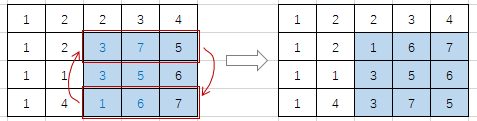
-
排序条件有两列，依次为选定区域的第1列、第2列
优先按第1列的值进行升序排序，行数据 [1, 6, 7] 排在最上
再按第2列的值进行升序排序，[3, 7, 5] 排在 [3, 5, 6] 下面



输入样例 2 复制
```
[[80, 59, 7, 25],
[81, 59, 7, 25],
[80, 56, 7, 12],
[13, 21, 97, 53]]
[1, 1, 3, 3]
[3, 1]
```
输出样例 2
```
[[80, 59, 7, 25],
[80, 56, 7, 25],
[81, 59, 7, 12],
[13, 21, 97, 53]]
```
提示样例 2
选中区域的排序条件按优先级依次为第3列、第1列。
第1行、第3行在两个排序条件上的值都相等，保持原有相对顺序。

In [285]:
from typing import List


class Solution:
    def sort_table(self, grid: List[List[int]], area: List[int], sort_cols: List[int]) -> List[List[int]]:
        row1, col1, row2, col2 = area
        temp_area = [x[col1 - 1:col2] for x in grid[row1 - 1:row2]]
        temp_cols = []
        for x in temp_area:
            temp = [[x[y - 1] for y in sort_cols]]
            temp.append(x)
            temp_cols.append(temp)
        temp_cols.sort(key=lambda x: x[0])
        temp_cols = [x[1:][0] for x in temp_cols]
        final = []
        for num, x in enumerate(grid):
            if row1 - 1 <= num < row2:
                x[col1 - 1:col2] = temp_cols[num - row1 + 1]
            final.append(x)
        return final

In [286]:
grid = [[1, 2, 2, 3, 4], [1, 2, 3, 7, 5], [1, 1, 3, 5, 6], [1, 4, 1, 6, 7]]
area = [2, 3, 4, 5]
sort_cols = [1, 2]

In [287]:
grid = [[80, 59, 7, 25],
        [81, 59, 7, 25],
        [80, 56, 7, 12],
        [13, 21, 97, 53]]
area = [1, 1, 3, 3]
sort_cols = [3, 1]

In [288]:
sol = Solution()
sol.sort_table(grid,area,sort_cols)

[[80, 59, 7, 25], [80, 56, 7, 25], [81, 59, 7, 12], [13, 21, 97, 53]]